In [1]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from Helpers import helpers

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

/opt/conda/lib/python3.9/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
import numpy as np


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_ if 'cluster_centers_' in dir(model) else model.labels_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [4]:
import pandas as pd


seeds_dataset = pd.read_csv('./data/Seed_Data.csv', header=None, skiprows=1, names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class'])
seeds_dataset

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [5]:
columns_for_evaluation = ['area', 'perimeter', 'length of kernel']
columns_for_evaluation_2d = ['area', 'perimeter']
seeds_dataset_y = seeds_dataset['class']
seeds_dataset = seeds_dataset.drop(columns=['class'])
seeds_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#seeds_dataset = seeds_dataset[columns_for_evaluation]
seeds_dataset_scaled =  seeds_dataset #pd.DataFrame(MinMaxScaler(feature_range=[-1, 1]).fit_transform(seeds_dataset), columns = seeds_dataset.columns)
seeds_dataset_scaled.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff36da8dc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff36da8dc0>
Traceback 

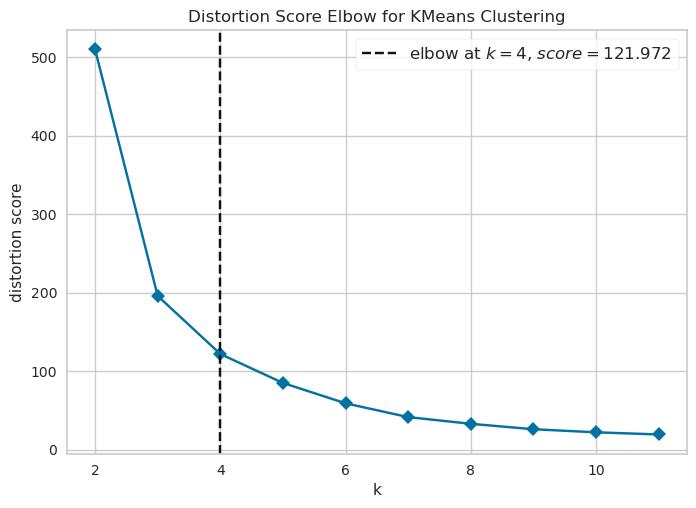

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
visualizer.fit(seeds_dataset[columns_for_evaluation_2d])      # Fit the data to the visualizer
visualizer.show()

In [8]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(seeds_dataset_scaled[columns_for_evaluation_2d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4ff96280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff80536700>
Traceback 

array([1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3,
       1, 0, 3, 1, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 3, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


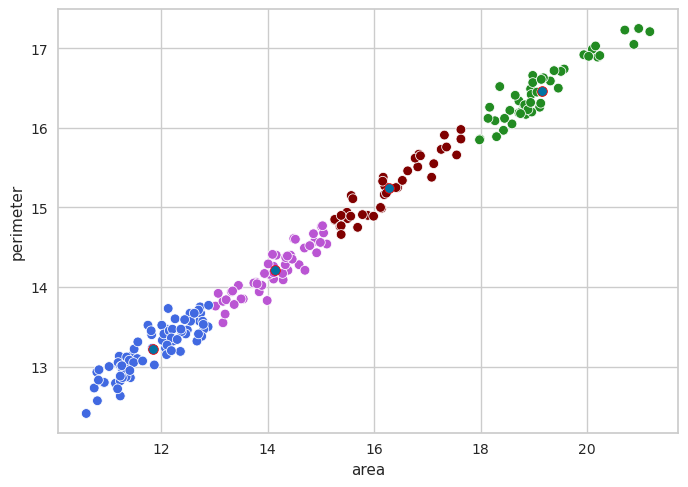

In [9]:
plot_2d_cluster(seeds_dataset_scaled, model, columns=columns_for_evaluation_2d)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff83d623a0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff83d623a0>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

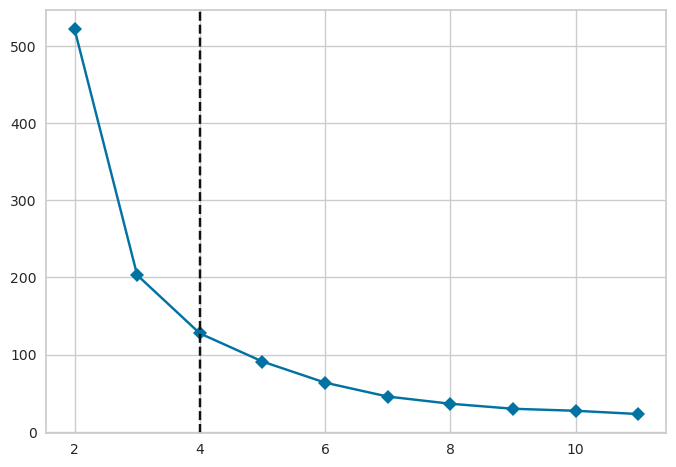

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(seeds_dataset_scaled[columns_for_evaluation])  

In [11]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(seeds_dataset_scaled[columns_for_evaluation])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4ff96280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4ff96280>
Traceback 

array([3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2,
       3, 0, 2, 3, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

In [12]:
seeds_dataset_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4fdb5820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff6369e5e0>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

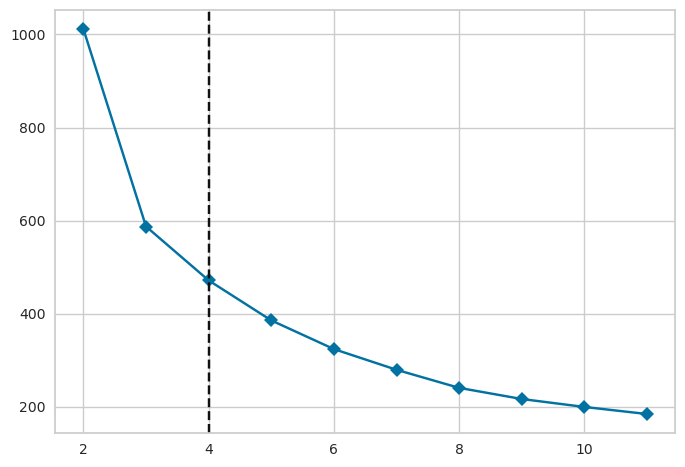

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(seeds_dataset_scaled)  

In [14]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(seeds_dataset_scaled)
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4fdadf70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff4fdadf70>
Traceback 

array([2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## DBSCAN

In [15]:
from Helpers import helpers

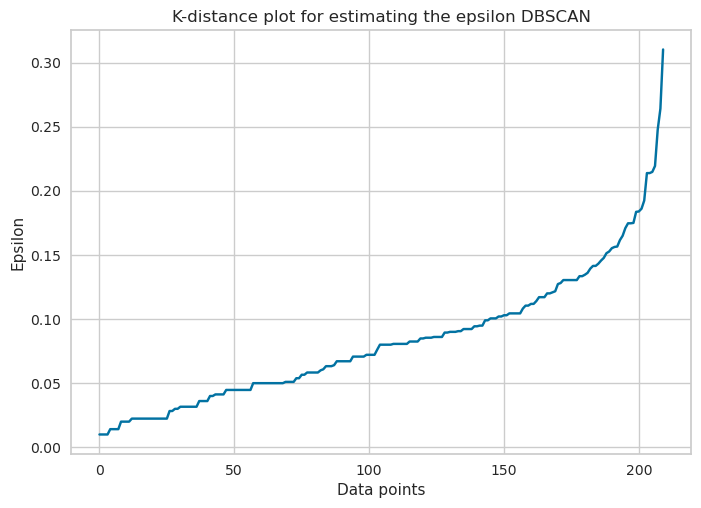

In [16]:
helpers.kDistancePlot(seeds_dataset_scaled[columns_for_evaluation_2d])

In [22]:
eps = 0.15

In [23]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
model.fit(seeds_dataset_scaled[columns_for_evaluation_2d])

DBSCAN(eps=0.15, min_samples=4)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

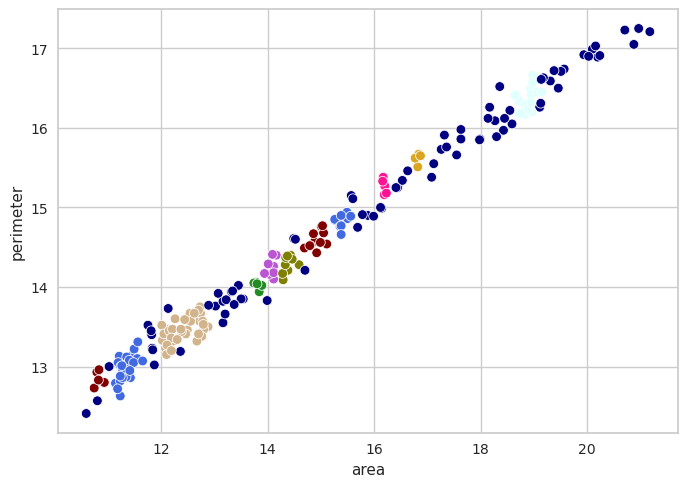

In [24]:
plot_2d_cluster(seeds_dataset_scaled, model, columns=columns_for_evaluation_2d)

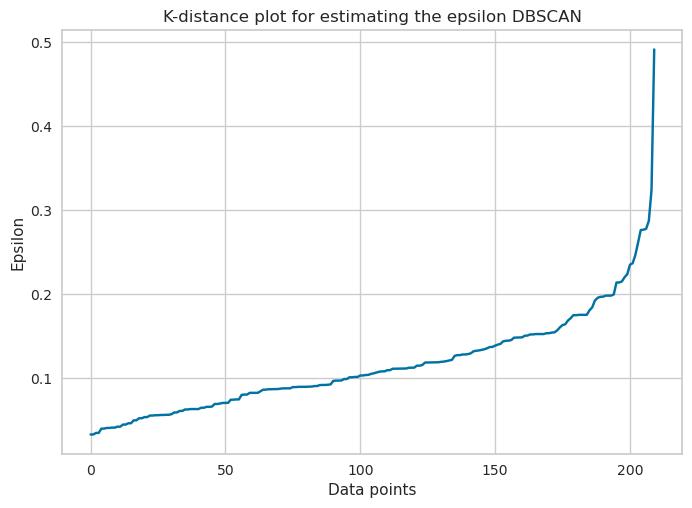

In [25]:
helpers.kDistancePlot(seeds_dataset_scaled[columns_for_evaluation])

In [26]:
eps = 0.2

model = DBSCAN(eps=eps, min_samples=6, metric='euclidean')
model.fit(seeds_dataset_scaled[columns_for_evaluation])

DBSCAN(eps=0.2, min_samples=6)

In [ ]:
model.labels_

array([ 0,  2, -1,  1, -1,  1,  2,  1, -1,  3,  0,  1,  1,  1,  1,  1, -1,
       -1, -1,  1,  2,  2, -1,  1,  0,  3,  1,  1,  2,  1,  1,  0, -1,  2,
        0, -1,  3, -1,  0,  1,  1,  1,  1, -1,  2,  1,  0,  2,  2,  0,  2,
        0,  0,  2,  0,  0,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,  2,  2,
        2,  1, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1,  3,  4, -1,  5,  5,
        4,  4, -1, -1, -1, -1,  4,  4,  4, -1, -1,  5, -1, -1,  4, -1, -1,
       -1,  5,  4,  4,  4, -1, -1,  4,  4,  5,  4,  4, -1,  5,  4,  4,  4,
       -1, -1,  4,  3,  4, -1,  4,  4, -1, -1, -1, -1,  4, -1,  3,  0, -1,
       -1, -1, -1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1])

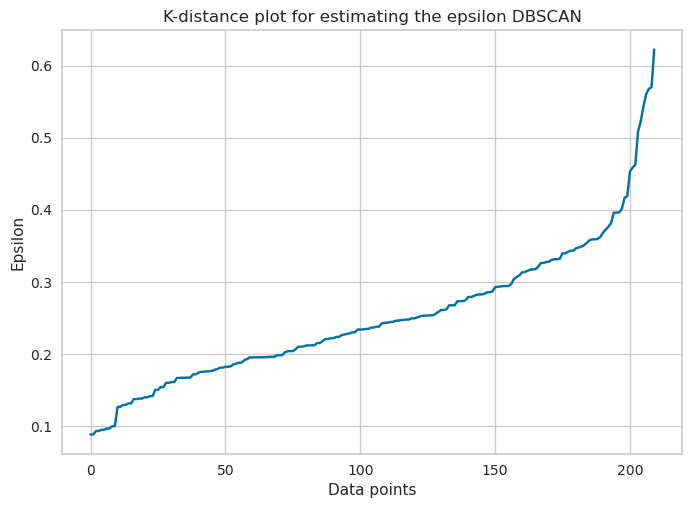

In [ ]:
helpers.kDistancePlot(seeds_dataset_scaled)

In [ ]:
len(seeds_dataset_scaled.columns)

7

## Affinity propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(seeds_dataset_scaled[columns_for_evaluation_2d])

AffinityPropagation()

Parameters:
- affinity propagation: damping=0.5, affinity='euclidean'
- k-means: n_clusters=4, init='random' algorithm: lloyd (both 2d and 3d and nD)
- dbscan: eps=0.15, min_samples=6, metric='euclidean' for 3d
- dbscan2d: eps=0.2, min_samples=4, metric='euclidean' for 2d
- dbscanND: eps=0.4, min_samples= (7 features * 2)

We decided to cut affinity propagtion as the time it takes for 15 minutes is to long (and it still did not converge).

In [ ]:
adult_dataset = adult_dataset.convert_dtypes()
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  Int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  Int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  Int64 
 11  capital-loss    32561 non-null  Int64 
 12  hours-per-week  32561 non-null  Int64 
 13  native-country  32561 non-null  string
 14  income          32561 non-null  string
 15  class           32561 non-null  Int64 
dtypes: Int64(7), string(9)
memory usage: 4.2 MB


In [ ]:
adult_dataset['class'] = adult_dataset['income']
adult_dataset['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: Int64

In [ ]:
adult_for_export = adult_dataset_numeric[columns_for_evaluation]
adult_for_export['class'] = adult_dataset['class']
adult_for_export_2d = adult_for_export.drop(columns=['capital-gain'])

/tmp/ipykernel_80728/1834067103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_for_export['class'] = adult_dataset['class']


In [ ]:
adult_for_export.head()

,age,fnlwgt,capital-gain,class
0,39,77516,2174,<=50K
1,50,83311,0,<=50K
2,38,215646,0,<=50K
3,53,234721,0,<=50K
4,28,338409,0,<=50K


In [ ]:
adult_for_export_2d.head()

,age,fnlwgt,class
0,39,77516,<=50K
1,50,83311,<=50K
2,38,215646,<=50K
3,53,234721,<=50K
4,28,338409,<=50K


In [ ]:
adult_for_export_2d.to_csv('./data/adult-dataset/adult_for_export_2d.csv', index=False)
adult_for_export.to_csv('./data/adult-dataset/adult_for_export_3d.csv', index=False)